# Logistic Regression


We are trying to decide between whether an object belongs to one of two categories:  $C_0$ and $C_1$.  In terms of probability, we frame this as the likelihood that something belongs to $C_1$ as:

$$ y = P(C_1 | x)$$

which is the conditional probability of $C_1$ given some $x$.  Because we are talking about a binary situation, we know:

$$ P(C_1 | x) + P(C_0 | X) = 1$$

$$ y + P(C_0 | X) = 1$$

$$ 1 - y = P(C_0 | X)$$

**Probability and Odds**

If we consider the odds of a binary event, we are really talking about 

$$\frac{p}{1 - p}$$

Recognizing this expression as having the same structure as the transformation that linearizes a set of data having an s-shaped curve, (i.e. $\frac{y}{1-y}$) we connect the idea of odds and that the logistic function is in fact giving us the **log odds** for some value $x$.  Hence, we have:

$$\ln(\frac{y}{1-y}) = \text{logit}(y)$$

and if we solve for $y$ we have:

$$y = \frac{1}{1 + e^{-(ax + b)}}$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Example

Heights of Boys against Girls.

In [2]:
b = np.random.normal(149.05, 3.75, 800)
g = np.random.normal(151.19, 3.75, 700)

(array([  8.,  25.,  72., 114., 132., 130., 114.,  65.,  22.,  18.]),
 array([141.69296106, 143.58655203, 145.480143  , 147.37373397,
        149.26732494, 151.16091591, 153.05450688, 154.94809785,
        156.84168881, 158.73527978, 160.62887075]),
 <a list of 10 Patch objects>)

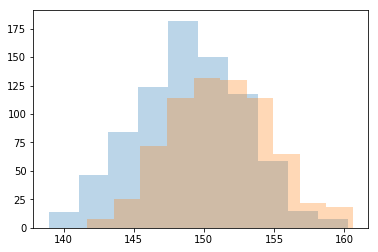

In [4]:
plt.hist(b, alpha = 0.3)
plt.hist(g, alpha = 0.3)

In [5]:
b = [[x, 0] for x in b]
g = [[x, 1] for x in g]

In [6]:
bg = np.array(b + g)

In [7]:
bg

array([[152.09879153,   0.        ],
       [142.5419709 ,   0.        ],
       [151.19126897,   0.        ],
       ...,
       [148.83109869,   1.        ],
       [149.47792677,   1.        ],
       [150.48355051,   1.        ]])

In [9]:
bg[:, 0]

array([152.09879153, 142.5419709 , 151.19126897, ..., 148.83109869,
       149.47792677, 150.48355051])

In [10]:
bg[:, 1]

array([0., 0., 0., ..., 1., 1., 1.])

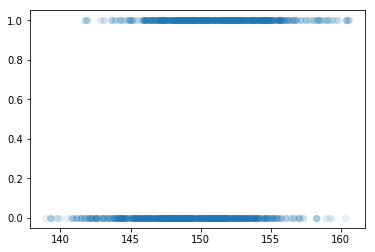

In [12]:
x = bg[:, 0]
y = bg[:, 1]
plt.plot(x, y, 'o', alpha = 0.1)

In [24]:
boy_girl = pd.DataFrame(bg, columns= ['heights', 'gender'])

In [25]:
boy_girl.head()

,heights,gender
0,152.098792,0.0
1,142.541971,0.0
2,151.191269,0.0
3,151.288552,0.0
4,146.779621,0.0


In [40]:
girls = boy_girl[boy_girl['gender'] == 1]

(array([  8.,  33., 105., 219., 351., 481., 595., 660., 682., 700.]),
 array([141.69296106, 143.58655203, 145.480143  , 147.37373397,
        149.26732494, 151.16091591, 153.05450688, 154.94809785,
        156.84168881, 158.73527978, 160.62887075]),
 <a list of 10 Patch objects>)

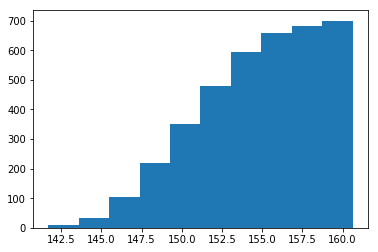

In [63]:
plt.hist(girls['heights'], cumulative = True)

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
X = boy_girl['heights'].values.reshape(-1,1)
y = boy_girl['gender']
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
lr.score(X, y)

0.5906666666666667

In [48]:
lr.coef_[0][0]

0.027950071932944687

In [49]:
lr.intercept_[0]

-4.315269419516591

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
predictions = lr.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.67      1.00      0.80       100
          1       0.00      0.00      0.00        50

avg / total       0.44      0.67      0.53       150



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
confusion_matrix(y, predictions)

array([[100,   0],
       [ 50,   0]])

  |  | $C_0$ | $C_1$ |
  | ----- | ----- | ----- |
  | $C_0$|  | |
  | $C_1$|  |  |
  
  **Precision**: Proportion of values from thos predicted to be in $C_1$ correctly.
  
  $$\frac{TP}{TP + FP}$$
  
  **Recall**: Proportion of values that are actually in $C_1$ predicted correctly.
  
  $$\frac{TP}{TP + FN}$$
  
  Ideally, we'd like this to be as high as possible in each regard.  We can understand the relationship between Precision and Recall through their harmonic mean -- the F1 score.
  
  **F1**: Harmonic mean of Precision and Recall
  
  $$\frac{2PR}{P + R}$$

In [104]:
from sklearn import datasets

In [105]:
iris = datasets.load_iris()

In [106]:
X = iris['data'][:, 3:]#petalwidth
y = (iris['target'] == 2).astype(np.int)

In [107]:
lgr = LogisticRegression()
lgr.fit(X,y)
predictions= lgr.predict(X)

In [108]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [109]:
prb_predict= lgr.predict_proba(X)
prb_predict

array([[0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.96880341, 0.03119659],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.98127896, 0.01872104],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.98127896, 0.01872104],
       [0.98127896, 0.01872104],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.95984502, 0.04015498],
       [0.96880341, 0.03119659],
       [0.96880341, 0.03119659],
       [0.96880341, 0.03119659],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.97581359, 0.02418641],
       [0.94845101, 0.05154899],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.95984502, 0.04015498],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.97581359, 0.02418641],
       [0.

In [110]:
probs = pd.DataFrame(prb_predict, columns=['0', '1'])

In [111]:
probs.head()

,0,1
0,0.975814,0.024186
1,0.975814,0.024186
2,0.975814,0.024186
3,0.975814,0.024186
4,0.975814,0.024186


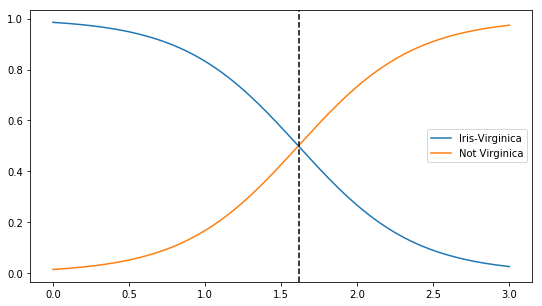

In [112]:
plt.figure(figsize = (9, 5))
x = np.linspace(0, 3, 150).reshape(-1,1)
y_probs= lgr.predict_proba(x)
plt.plot(x, y_probs[:, 0], label= 'Iris-Virginica')
plt.plot(x,y_probs[:,1], label= 'Not Virginica')
plt.legend()
plt.axvline(x = 1.62, color= 'black',linestyle = '--')

In [117]:
from sklearn.metrics import precision_recall_curve
from sklearn.cross_validation import cross_val_predict, cross_val_score

In [134]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [135]:
precision_score(y, predictions)

0.9583333333333334

In [136]:
recall_score(y, predictions)

0.92

In [137]:
f1_score(y, predictions)

0.9387755102040817

- Classifying Videos for Kids?
- Detecting Cancer?
- Detecting Shoplifters?